## Reprojection of existing 360 JPGs into cube-like reprojected images

**ODMax** allows for immediate reprojection of your 360 images into a cube-like reprojection. You can do so by passing several options, as demonstrated below in the help of the command-line utility.

In [8]:
!odmax --help

Usage: odmax [options]

Options:
  -h, --help            show this help message and exit
  -i INFILE, --infile=INFILE
                        Input video file, compatible with OpenCV2
  -o OUTPATH, --outpath=OUTPATH
                        Directory to write output files.
  -c ENCODER, --encoder=ENCODER
                        encoder to use to write stills (default: jpg). Can be
                        "jpg", "bmp", "jp2", "png" or "webp"
  -p PREFIX, --prefix=PREFIX
                        Prefix to use for written image files
  -r, --reproject       Reproject 360 degree stills to cube with 6 faces
  -f FACE_W, --face-width=FACE_W
                        Length of faces of reprojected cube in pixels
                        (default: 256). Only used in combination with
                        --reproject
  -m MODE, --mode=MODE  Mode of reprojection interpolation, can be "bilinear"
                        or "nearest" (default: "nearest"). Only used in
                        combinati

### import packages
let's first import the necessary packages for this notebook

In [1]:
%matplotlib inline
import os
import odmax
import cv2
import numpy as np
import py360convert
import odmax
import matplotlib.pyplot as plt

### command-line processing including projection
We show an example with the video **XXXXXXX** from the examples folder. We extract frames once every second, and on-the-fly reproject the frames on a cube-like projection. Please note that we also write the results into a temporary folder on your home directory, so please delete these afterwards. The command issued at the end of the next code-block essentially does the following:

* `-r`         : indicate that reprojection should be done
* `-f 1024`    : in reprojection, each face will be 1024 pixels long
* `-m bilinear`: the mode of resampling is bilinear (but can also be nearest)
* `-s 0`       : we start extraction at zero seconds
* `-e 1`       : we end extraction at 1 seconds
* `-d 5`       : we extract every 5th frame


In [2]:
video_file = os.path.join("..", "examples", "forest.mp4")
path_out = os.path.join("..", "tmp")
# make the output path if it doesn't exist
if not(os.path.isdir(path_out)):
    os.makedirs(path_out)
print(f"Processing {video_file} and writing outputs to {os.path.abspath(path_out)}")
#TODO use utility
!odmax -r -f 1024 -m bilinear -s 0 -e 1 -d 5 -i $video_file -o $path_out

Processing ../examples/forest.mp4 and writing outputs to /home/hcwinsemius/git/ODMax/tmp
Processing video ../examples/forest.mp4
Processing frame 00000
Processing frame 00005
Processing frame 00010
Processing frame 00015
Processing frame 00020
Processing frame 00025
Processing frame 00030
Processing frame 00035
Processing frame 00040
Processing frame 00045


### more control over processing
It is also possible to have more control over what odmax does by using the API. Below, we show that we can read a 360-still .JPG (i.e. not projected) and reproject that to a 6-directional cube-like projection.

Let's first read the still

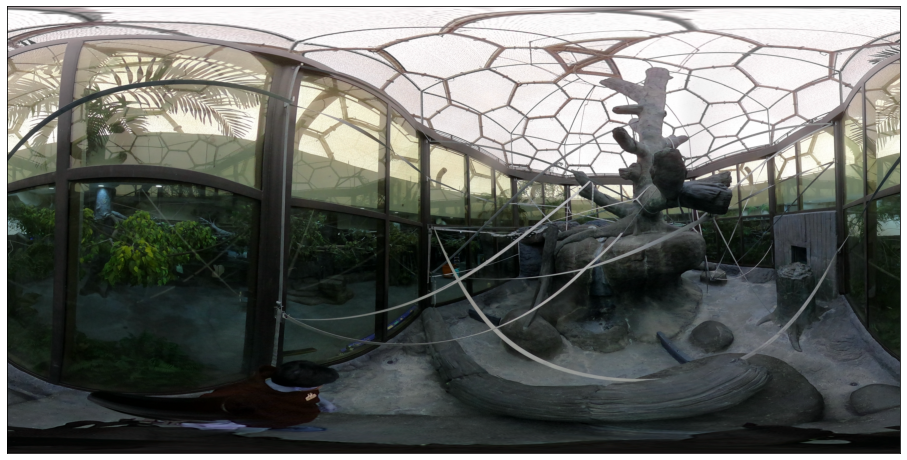

In [3]:
# read still and display
fn_photo = "../examples/GS__2098.JPG"
img = cv2.imread(fn_photo)
plt.figure(figsize=(16, 10))
plt.imshow(img)
plt.tick_params(
    left=False,
    right=False,
    labelleft=False,
    labelbottom=False,
    bottom=False
)


Now we can reproject the still

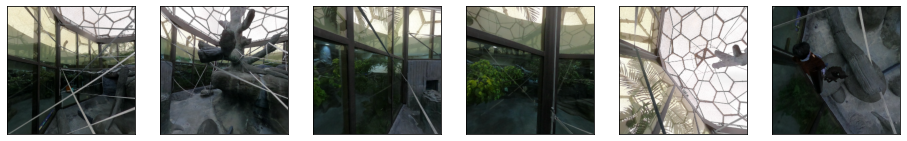

In [6]:
cube_imgs = odmax.process.reproject_cube(img, face_w=256, mode='bilinear')
f, axs = plt.subplots(1, 6, figsize=(16, 7))
for ax, cube_img in zip(axs, cube_imgs):
    ax.imshow(cube_img)
    ax.tick_params(
        left=False,
        right=False,
        labelleft=False,
        labelbottom=False,
        bottom=False
    )


In [14]:
isinstance(img, np.ndarray)


True

In [11]:
a = np.array([0., 2.])

In [13]:
type(a)

numpy.ndarray